In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, C the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
import re
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [3]:
df = pd.read_csv('./deceptive-opinion.csv')

In [4]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [5]:
df = df.drop(["hotel", "polarity","source"], axis=1)

In [6]:
df = df.sample(frac=1)

In [7]:
df.head()

,deceptive,text
551,deceptive,We stayed at the Millennium Knickerbocker last...
659,deceptive,I had a wonderful time at the James Hotel whil...
1133,truthful,The Palmer House has a beautiful lobby with a ...
940,truthful,We booked our hotel stay thru Yahoo and reques...
689,deceptive,My husband and I satayed for two nights at the...


In [8]:
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['deceptive']= label_encoder.fit_transform(df['deceptive']) 

df['deceptive'].unique() 

array([0, 1])

In [9]:
df.head()

,deceptive,text
551,0,We stayed at the Millennium Knickerbocker last...
659,0,I had a wonderful time at the James Hotel whil...
1133,1,The Palmer House has a beautiful lobby with a ...
940,1,We booked our hotel stay thru Yahoo and reques...
689,0,My husband and I satayed for two nights at the...


In [10]:
#dataset description #truthful=1 deceptive=0
df.groupby('deceptive').describe()

text                                                               
          count unique                                                top freq
deceptive                                                                     
0           800    800  The Talbott Hotel is fantastic! I stayed there...    1
1           800    796  Very disappointed in our stay in Chicago Monoc...    2

In [11]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

In [12]:
# Some preprocesssing that will be common to all the text classification methods

puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def clean_char(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

In [13]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [14]:
df['text'] = df['text'].map(lambda a: clean_numbers(a))

In [15]:
df['text'] = df['text'].map(lambda a: clean_char(a))

In [16]:
df['text'] = df['text'].map(lambda a: clean_text(a))

In [17]:
df['text']

551     stay millennium knickerbock last week realli w...
659     wonder time jame hotel busi chicago room moder...
1133    palmer hous beauti lobbi great bar restaur roo...
940     book hotel stay thru yahoo request room bed go...
689     husband satay two night hilton chicago enjoy e...
                              ...                        
1274    recent stay hyatt regenc chicago boy surpris h...
504     would first like say invit room wife enjoy war...
1566    pictur websit sure deceiv real life palmer hou...
126     daughter chicago one night attend three day co...
663     need jame tell impress stay jame chicago hotel...
Name: text, Length: 1600, dtype: object

In [18]:
df.describe()

,deceptive
count,1600.000000
mean,0.500000
std,0.500156
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 551 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   int64 
 1   text       1600 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.5+ KB


In [20]:
x = df['text']
y = df['deceptive']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], random_state=5)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1600
Number of rows in the training set: 1200
Number of rows in the test set: 400


In [23]:
X_train, X_test, y_train, y_test

(1275    boyfriend check room omni chicago irrit see be...
 1581    hotel allegro locat chicago loop provid wife o...
 1160    leav import document room call ask lost found ...
 682     hotel locat right hustl bustl citi chicago ide...
 905     even though review hotel good good thing locat...
                               ...                        
 567     thank ambassador east hotel provid realli grea...
 390     stay allegro coupl time like kimpton properti ...
 1430    truli sort person write negat review establish...
 388     nice hotel small adequ room decor love daughte...
 559     stay hotel weekend thought realli nice bed ext...
 Name: text, Length: 1200, dtype: object,
 520     may concern name jami brown recent guest juli ...
 228     love ambassador great hotel realli beauti room...
 1083    stay hotel busi trip conduct busi meet hotel b...
 1119    stay actual compel write review fall asleep fr...
 392     stay ich chicago busi novemb love royal ambass...
              

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [25]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [26]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [27]:
predictions = naive_bayes.predict(testing_data)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mnbaccuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.89
Precision score:  0.9101123595505618
Recall score:  0.8526315789473684
F1 score:  0.8804347826086957


In [29]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(training_data, y_train)

SVC()

In [30]:
svc_predictions = svc.predict(testing_data)

In [31]:
from sklearn.metrics import accuracy_score
svcaccuracy = accuracy_score(y_test,svc_predictions)
print('Accuracy score: ', format(accuracy_score(y_test,svc_predictions)))
print('Precision score: ', format(precision_score(y_test,svc_predictions)))
print('Recall score: ', format(recall_score(y_test, svc_predictions)))
print('F1 score: ', format(f1_score(y_test, svc_predictions)))

Accuracy score:  0.855
Precision score:  0.8203883495145631
Recall score:  0.8894736842105263
F1 score:  0.8535353535353535


In [32]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(training_data, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
knn_predictions = knn.predict(testing_data)

In [34]:
from sklearn.metrics import accuracy_score
knnaccuracy = accuracy_score(knn_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(knn_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))

Accuracy score:  0.5875
Precision score:  0.8571428571428571
Recall score:  0.15789473684210525
F1 score:  0.26666666666666666


In [35]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
training_data1 = training_data.toarray()
gnb.fit(training_data1, y_train)

GaussianNB()

In [36]:
testing_data1= testing_data.toarray()
gnb_predictions = gnb.predict(testing_data1)

In [37]:
from sklearn.metrics import accuracy_score
gnb_accuracy = accuracy_score(gnb_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(gnb_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,gnb_predictions)))
print('Recall score: ', format(recall_score(y_test, gnb_predictions)))
print('F1 score: ', format(f1_score(y_test, gnb_predictions)))

Accuracy score:  0.6575
Precision score:  0.6514285714285715
Recall score:  0.6
F1 score:  0.6246575342465753


In [38]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model.fit(training_data1, y_train)

DecisionTreeClassifier(max_depth=2)

In [39]:
dtree_predictions = dtree_model.predict(testing_data) 

In [40]:
from sklearn.metrics import accuracy_score
dtree_accuracy = accuracy_score(dtree_predictions,y_test )
print('Accuracy score: ', format(accuracy_score(dtree_predictions,y_test )))
print('Precision score: ', format(precision_score(y_test,dtree_predictions)))
print('Recall score: ', format(recall_score(y_test, dtree_predictions)))
print('F1 score: ', format(f1_score(y_test, dtree_predictions)))

Accuracy score:  0.6775
Precision score:  0.6967741935483871
Recall score:  0.5684210526315789
F1 score:  0.6260869565217392


In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
sgd_clf = SGDClassifier()
sgd_clf.fit(training_data, y_train)

SGDClassifier()

In [43]:
sgdpredicted = sgd_clf.predict(testing_data)

In [44]:
from sklearn.metrics import accuracy_score
sgd_accuracy = accuracy_score(sgdpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(sgdpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,sgdpredicted)))
print('Recall score: ', format(recall_score(y_test, sgdpredicted)))
print('F1 score: ', format(f1_score(y_test, sgdpredicted)))

Accuracy score:  0.86
Precision score:  0.8563829787234043
Recall score:  0.8473684210526315
F1 score:  0.8518518518518519


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()
lr.fit(training_data, y_train)

LogisticRegression()

In [47]:
lrpredicted = lr.predict(testing_data)

In [48]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(lrpredicted,y_test )
print('Accuracy score: ', format(accuracy_score(lrpredicted,y_test )))
print('Precision score: ', format(precision_score(y_test,lrpredicted)))
print('Recall score: ', format(recall_score(y_test, lrpredicted)))
print('F1 score: ', format(f1_score(y_test, lrpredicted)))

Accuracy score:  0.87
Precision score:  0.8670212765957447
Recall score:  0.8578947368421053
F1 score:  0.8624338624338626


In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [50]:
print('Multinomial Naive Bayes:',mnbaccuracy)
print('Gausian Naive Bayes:',gnb_accuracy)
print('Decision tree:',dtree_accuracy)
print('Support Vector Classifier:',svcaccuracy)
print('K-Nearest Neighbour:',knnaccuracy)
print('Stochastic Gradient Descent:',sgd_accuracy)
print('LogisticRegression:',lr_accuracy)

Multinomial Naive Bayes: 0.89
Gausian Naive Bayes: 0.6575
Decision tree: 0.6775
Support Vector Classifier: 0.855
K-Nearest Neighbour: 0.5875
Stochastic Gradient Descent: 0.86
LogisticRegression: 0.87


In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(training_data)
y_kmeans = kmeans.predict(training_data)

In [52]:
print(stemmed[0:1600])

NameError: name 'stemmed' is not defined

AUC: 0.644


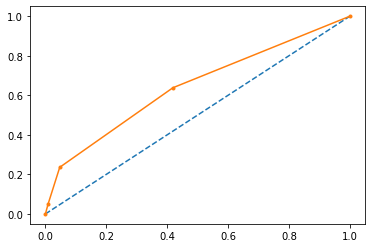

In [53]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.933


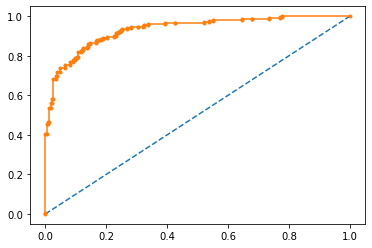

In [54]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = LogisticRegression()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.689


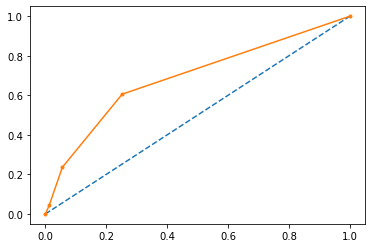

In [55]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = DecisionTreeClassifier(max_depth = 2)
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.687


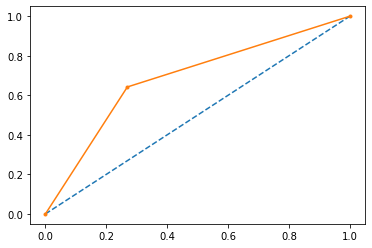

In [56]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = GaussianNB()
training_data1 = training_data.toarray()
model.fit(training_data1, trainy)
# predict probabilities
testing_data1 = testing_data.toarray()
probs = model.predict_proba(testing_data1)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AUC: 0.951


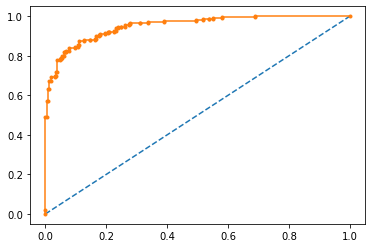

In [57]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = MultinomialNB()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [58]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=2)
#vectorizer
training_data = count_vector.fit_transform(trainX)
testing_data = count_vector.transform(testX)
# fit a model
model = SVC()
model.fit(training_data, trainy)
# predict probabilities
probs = model.predict_proba(testing_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

AttributeError: predict_proba is not available when  probability=False